In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap


In [ ]:
df = pd.read_csv('/content/sample_data/PCOS_SMOTED_Reduced.csv')
data_dict = df.to_dict(orient='list')
print(data_dict)    # dlt this cell

{' Age (yrs)': [28, 36, 33, 37, 25, 36, 34, 33, 32, 36, 20, 26, 25, 38, 34, 38, 29, 36, 31, 30, 25, 38, 34, 28, 34, 41, 30, 20, 25, 28, 32, 34, 31, 38, 28, 32, 37, 26, 36, 20, 32, 29, 28, 24, 29, 25, 28, 26, 34, 27, 23, 23, 31, 32, 32, 37, 38, 36, 26, 26, 29, 32, 24, 29, 27, 32, 41, 35, 35, 34, 33, 29, 36, 26, 35, 36, 32, 34, 37, 38, 36, 34, 39, 35, 34, 27, 31, 40, 22, 36, 44, 35, 28, 32, 27, 22, 28, 31, 32, 32, 30, 34, 38, 34, 29, 25, 28, 27, 24, 34, 21, 26, 39, 32, 29, 29, 35, 28, 33, 29, 30, 33, 22, 23, 26, 38, 40, 42, 41, 40, 24, 25, 22, 28, 35, 30, 26, 35, 27, 35, 36, 28, 30, 32, 37, 35, 36, 28, 23, 24, 28, 29, 31, 29, 26, 26, 27, 34, 25, 32, 36, 38, 23, 32, 35, 32, 29, 29, 30, 33, 28, 29, 31, 35, 37, 27, 28, 24, 37, 35, 30, 30, 42, 36, 26, 27, 32, 43, 28, 23, 34, 29, 30, 30, 29, 35, 35, 28, 32, 25, 30, 28, 28, 23, 30, 28, 24, 32, 27, 35, 32, 39, 27, 26, 29, 41, 36, 34, 26, 27, 39, 31, 27, 30, 36, 32, 35, 29, 31, 28, 40, 22, 35, 31, 27, 28, 33, 25, 32, 20, 24, 23, 37, 29, 39, 23, 

# Dataset

In [ ]:
# Run this cell
data = {' Age (yrs)': [28, 36, 33, 37, 25, 36, 34, 33, 32, 36, 20, 26, 25, 38, 34, 38, 29, 36, 31, 30, 25, 38, 34, 28, 34, 41, 30, 20, 25, 28, 32, 34, 31, 38, 28, 32, 37, 26, 36, 20, 32, 29, 28, 24, 29, 25, 28, 26, 34, 27, 23, 23, 31, 32, 32, 37, 38, 36, 26, 26, 29, 32, 24, 29, 27, 32, 41, 35, 35, 34, 33, 29, 36, 26, 35, 36, 32, 34, 37, 38, 36, 34, 39, 35, 34, 27, 31, 40, 22, 36, 44, 35, 28, 32, 27, 22, 28, 31, 32, 32, 30, 34, 38, 34, 29, 25, 28, 27, 24, 34, 21, 26, 39, 32, 29, 29, 35, 28, 33, 29, 30, 33, 22, 23, 26, 38, 40, 42, 41, 40, 24, 25, 22, 28, 35, 30, 26, 35, 27, 35, 36, 28, 30, 32, 37, 35, 36, 28, 23, 24, 28, 29, 31, 29, 26, 26, 27, 34, 25, 32, 36, 38, 23, 32, 35, 32, 29, 29, 30, 33, 28, 29, 31, 35, 37, 27, 28, 24, 37, 35, 30, 30, 42, 36, 26, 27, 32, 43, 28, 23, 34, 29, 30, 30, 29, 35, 35, 28, 32, 25, 30, 28, 28, 23, 30, 28, 24, 32, 27, 35, 32, 39, 27, 26, 29, 41, 36, 34, 26, 27, 39, 31, 27, 30, 36, 32, 35, 29, 31, 28, 40, 22, 35, 31, 27, 28, 33, 25, 32, 20, 24, 23, 37, 29, 39, 23, 26, 24, 33, 29, 45, 30, 47, 36, 28, 36, 33, 27, 43, 31, 38, 32, 38, 37, 34, 40, 25, 28, 25, 26, 30, 26, 43, 30, 30, 27, 36, 29, 45, 26, 31, 31, 38, 32, 32, 38, 26, 29, 35, 27, 27, 35, 30, 27, 28, 30, 31, 20, 34, 26, 40, 28, 26, 25, 35, 37, 41, 24, 33, 24, 39, 30, 28, 38, 34, 28, 30, 28, 47, 32, 33, 38, 28, 37, 40, 35, 45, 31, 30, 29, 33, 29, 27, 31, 30, 30, 21, 36, 31, 29, 26, 26, 32, 25, 36, 30, 28, 31, 32, 30, 22, 36, 27, 30, 33, 28, 32, 32, 34, 36, 34, 35, 42, 31, 35, 38, 23, 20, 22, 35, 28, 31, 29, 28, 32, 27, 35, 28, 23, 31, 37, 35, 29, 32, 37, 41, 40, 24, 31, 23, 28, 35, 27, 32, 28, 29, 31, 35, 36, 30, 27, 28, 28, 27, 26, 33, 33, 36, 45, 40, 34, 40, 23, 26, 30, 31, 26, 32, 27, 36, 25, 40, 38, 42, 29, 37, 33, 32, 28, 33, 25, 42, 29, 33, 23, 30, 29, 32, 33, 34, 26, 31, 40, 39, 27, 26, 29, 47, 41, 33, 34, 30, 31, 35, 35, 32, 31, 31, 36, 36, 27, 33, 33, 41, 34, 33, 35, 32, 40, 25, 34, 31, 26, 39, 48, 31, 32, 42, 28, 27, 26, 44, 32, 33, 31, 30, 30, 36, 36, 28, 35, 23, 25, 30, 30, 27, 34, 35, 23, 28, 40, 38, 38, 31, 33, 35, 35, 37, 36, 46, 24, 44, 23, 21, 32, 31, 34, 27, 24, 28, 27, 40, 29, 36, 27, 27, 32, 22, 41, 32, 38, 34, 39, 26, 24, 26, 35, 30, 36, 27, 23, 37, 41, 27, 28, 26, 34, 31, 29, 26, 31, 28, 28, 33, 30, 22, 29, 33, 27, 36, 28, 38, 35, 30, 27, 22, 30, 31, 24, 32, 35, 27, 25, 30, 29, 35, 30, 22, 36, 39, 31, 32, 33, 25, 32, 33, 31, 23, 34, 24, 28, 25, 29, 27, 28, 36, 29, 29, 29, 30, 27, 29, 25, 23, 39, 30, 27, 35, 29, 35, 31, 28, 24, 25, 33, 34, 36, 34, 24, 22, 34, 27, 25, 30, 24, 27, 23, 28, 39, 25, 32, 40, 39, 29, 27, 25, 22, 27, 30, 28, 24, 28, 39, 34, 32, 28, 24, 29, 32, 30, 25, 24, 31, 28, 26, 29, 39, 25, 30, 23, 30, 27, 35, 22, 30, 29, 27, 30, 30, 36, 32, 23, 28, 26, 33, 32, 27, 25, 33, 28, 33, 34, 30, 27, 28, 25, 28, 35, 33, 25, 28, 31, 35, 39, 33, 31, 31, 27, 47, 26, 33, 27, 28, 30, 32, 33, 28, 28, 31, 43, 27, 32, 33, 23, 30, 23, 28, 28, 23, 28, 31, 28, 28, 32, 35, 35, 39, 31], 'BMI': [19.3, 24.9, 25.3, 29.7, 20.1, 27.2, 26.3, 23.1, 16.0, 23.1, 26.7, 19.1, 32.0, 21.6, 21.8, 33.9, 19.6, 27.0, 20.7, 31.2, 26.3, 20.5, 26.7, 28.1, 25.2, 18.2, 29.7, 29.4, 24.8, 24.2, 20.8, 25.3, 24.1, 19.8, 20.0, 26.1, 29.2, 29.2, 21.2, 25.3, 16.4, 28.7, 13.4, 25.0, 23.6, 23.3, 27.5, 16.4, 21.2, 21.5, 23.0, 21.6, 20.3, 27.2, 25.1, 23.8, 21.9, 25.1, 30.0, 35.7, 24.0, 29.3, 20.8, 25.5, 24.9, 24.0, 21.9, 26.8, 23.5, 23.6, 24.0, 26.8, 27.4, 26.3, 25.5, 30.4, 18.6, 23.1, 21.3, 38.3, 25.3, 22.9, 20.1, 20.5, 24.7, 26.3, 26.3, 23.0, 24.6, 28.5, 29.8, 20.0, 31.4, 21.4, 26.4, 20.8, 28.5, 38.5, 23.0, 25.4, 24.9, 28.2, 29.0, 22.3, 23.7, 21.2, 23.4, 22.2, 23.9, 31.3, 26.2, 26.0, 24.6, 23.4, 28.2, 26.8, 26.2, 28.3, 31.6, 23.8, 24.9, 21.9, 32.9, 17.8, 30.9, 22.5, 23.6, 21.9, 24.0, 19.0, 29.7, 21.1, 25.3, 28.4, 28.7, 27.7, 25.6, 19.3, 23.0, 27.4, 22.7, 22.8, 27.6, 20.0, 29.0, 26.6, 31.6, 28.1, 22.9, 22.5, 24.0, 25.1, 24.7, 24.1, 17.2, 19.7, 21.3, 25.6, 26.3, 25.6, 24.5, 24.2, 26.0, 25.0, 26.6, 20.4, 26.1, 26.7, 29.0, 22.4, 21.9, 24.7, 22.5, 30.6, 26.0, 25.1, 31.2, 29.7, 31.2, 21.4, 31.1, 21.0, 21.6, 28.4, 22.2, 21.5, 27.5, 26.9, 32.0, 22.9, 23.1, 26.9, 24.0, 18.2, 21.6, 25.5, 23.0, 28.0, 20.7, 22.7, 18.8, 22.4, 30.1, 23.3, 21.0, 24.2, 32.0, 28.5, 22.7, 29.1, 25.7, 24.4, 23.1, 31.1, 27.3, 27.7, 25.1, 28.8, 19.1, 32.0, 26.4, 12.4, 26.0, 21.7, 26.8, 23.1, 24.4, 28.2, 28.2, 31.3, 30.7, 32.9, 21.0, 21.6, 19.5, 24.8, 25.3, 17.7, 24.5, 22.2, 19.5, 24.3, 25.7, 27.3, 38.5, 24.3, 20.3, 29.0, 27.8, 21.1, 36.3, 29.1, 26.4, 20.4, 21.4, 13.5, 15.6, 19.9, 14.3, 19.9, 14.5, 15.6, 21.3, 18.5, 14.6, 13.9, 26.1, 23.3, 23.2, 24.9, 19.6, 21.2, 17.3, 22.5, 25.2, 20.3, 28.8, 29.3, 21.1, 24.0, 26.0, 21.2, 26.1, 27.2, 19.9, 21.4, 28.3, 22.9, 27.5, 24.8, 30.9, 21.2, 27.2, 15.4, 26.8, 23.7, 20.8, 23.1, 29.0, 21.6, 28.4, 22.9, 27.3, 26.0, 23.1, 24.2, 16.6, 27.2, 22.5, 19.8, 22.0, 27.8, 22.4, 19.1, 22.0, 23.3, 28.6, 21.0, 22.2, 25.3, 24.4, 22.2, 27.1, 23.3, 25.6, 22.8, 23.4, 21.2, 25.1, 20.4, 22.9, 24.6, 23.6, 19.2, 26.8, 17.7, 32.8, 34.3, 28.2, 22.9, 26.0, 26.0, 16.0, 32.8, 24.8, 21.6, 30.9, 22.4, 23.1, 28.8, 23.6, 24.7, 22.3, 20.4, 21.6, 24.4, 29.5, 18.8, 25.2, 25.7, 25.7, 28.3, 19.3, 20.8, 19.2, 30.1, 29.0, 23.5, 22.4, 26.0, 21.6, 26.2, 29.3, 15.8, 25.1, 24.0, 26.0, 26.4, 20.8, 24.3, 25.1, 28.1, 20.4, 24.2, 22.8, 28.2, 21.5, 26.0, 24.3, 20.8, 26.4, 26.0, 18.0, 25.1, 15.8, 29.3, 26.2, 26.0, 25.3, 24.6, 22.4, 25.9, 25.0, 25.0, 17.3, 20.0, 22.3, 24.6, 22.3, 23.1, 21.9, 23.6, 23.2, 23.1, 25.6, 23.5, 20.3, 27.4, 25.4, 24.5, 19.7, 27.6, 25.3, 24.4, 20.4, 26.9, 25.6, 25.2, 21.9, 26.0, 27.4, 26.0, 22.8, 21.5, 28.0, 22.1, 21.3, 28.8, 28.3, 28.2, 20.3, 22.1, 22.4, 24.4, 23.1, 32.0, 24.0, 24.5, 27.9, 24.9, 24.6, 16.9, 20.0, 24.0, 24.4, 23.1, 21.0, 15.1, 25.1, 23.2, 25.2, 21.9, 33.5, 17.6, 23.1, 22.2, 26.4, 24.4, 25.6, 23.2, 23.4, 21.6, 25.1, 21.1, 24.1, 22.6, 22.4, 38.9, 23.4, 23.9, 19.2, 30.8, 16.5, 35.2, 25.9, 18.2, 19.4, 26.8, 28.2, 30.8, 25.7, 24.4, 24.0, 21.1, 21.9, 26.6, 20.0, 27.6, 23.7, 24.5, 25.5, 25.8, 23.1, 22.6, 18.3, 22.5, 18.1, 26.5, 24.1, 23.4, 22.7, 27.8, 26.4, 21.9, 22.3, 25.7, 21.6, 25.2, 23.6, 21.1, 17.7, 32.5, 21.9, 26.7, 24.0, 19.1, 25.0, 23.6, 27.1, 19.6, 24.4, 26.0, 22.3, 20.5, 19.1, 30.7, 18.5, 25.3, 23.4, 22.2, 30.1, 27.730723503516582, 23.799205456508368, 18.2279591843104, 24.35429535949345, 21.61920582654197, 23.53052150669603, 28.211953216098475, 27.95180866522538, 18.502577265924117, 23.843075891287132, 23.836960371144876, 26.54709169394821, 27.633772145962972, 12.750159223243395, 21.48112454411108, 27.324417590940136, 38.5, 22.549074493526792, 24.78294872616919, 27.32846481918796, 25.29953166070421, 28.324348516064827, 21.274303132342222, 25.40723892868541, 20.33408941937544, 25.96656484247441, 21.18453838026584, 28.191762998604435, 25.188251044495548, 25.432683583130828, 27.87496587302463, 20.1438670171474, 26.184603405269648, 29.622129303469222, 30.59060300655757, 20.888753826218966, 25.14665230888838, 26.26699529783377, 28.50366085096738, 22.594803115612567, 24.4, 28.734521876331428, 26.24662220799094, 28.809915219870167, 32.49929338072262, 25.226870268940274, 27.80842327093286, 23.26647662504373, 19.290985455652653, 22.631735853442795, 29.89606720746533, 19.47276799369944, 23.730756041821056, 27.93676009258386, 22.14166431902128, 23.7757515861151, 28.122088762205763, 28.58329156115525, 17.670986132478586, 23.758014149981463, 26.628708420862225, 27.475403669777844, 24.12130542166462, 24.4, 30.222123284394343, 31.37619283805244, 25.38445981297521, 27.471449058474256, 24.59540020381248, 13.457942062005628, 26.99516277681663, 20.77223046748007, 29.08787027315382, 28.381144947046337, 22.94596616385499, 25.1, 24.610063651565547, 23.401049725627683, 25.852411918821147, 24.22004495422567, 23.720072116646502, 26.05349497001169, 25.1966728217458, 28.217512475508773, 21.502997040193662, 22.84121289719095, 18.114784649478327, 38.54694546272427, 26.45289706001931, 29.108726922517327, 28.220930357929205, 28.30997514007237, 28.074129836802296, 27.671885371180057, 27.27654710863705, 21.113050257588224, 23.78162746243616, 24.956021953341832, 25.09373171227158, 16.793647891447492, 27.39565242649879, 24.40598665575422, 28.279008489734046, 28.072863220210028, 25.02448242292986, 32.437052378227605, 23.23452724289588, 24.37561283548761, 13.824994546686495, 20.53434319086949, 21.66648696900473, 25.07952629504105, 30.09940635374858, 28.01152545217331, 26.397691863653836, 36.097125823551366, 20.72231839194333, 28.51762815367752, 25.936332618185897, 30.34842981674101, 24.569116237195512, 25.188649995244965, 25.52386412467298, 28.44414315193176, 24.62216619793853, 24.73971773229917, 25.168014198456344, 23.63378481193262, 26.930915139377763, 29.59924084871402, 29.45556567879521, 26.77039244142347, 26.763771752789182, 27.69099057061392, 22.51471362084718, 26.26283909057373, 23.37094482031222, 35.58446972652135, 15.324315632169224, 22.023464076488025, 31.55917588354449, 28.60552993367098, 25.23012644450751, 22.90817628956175, 26.27739612319816, 30.341454471069227, 25.13818220623007, 25.971187142225396, 20.675024213730264, 22.213656566452972, 22.03133392077115, 25.78546218080423, 24.40699831651892, 23.52674903552918, 37.4554064119232, 24.322141207939872, 23.42616514992614, 24.982910933232503, 25.734238470422955, 23.89038831867508, 22.07361501563844, 27.01859413030725, 23.473267009269644, 22.879587921486884, 25.240697971270443, 26.90109571776862, 22.27189652820277, 21.36690822651941, 35.745159573278364, 24.0010369725548, 26.84878821829968, 26.945194604547016, 26.0, 29.85093498747278, 26.53199818070243, 21.23104117880889, 26.77790658250104, 28.57886489550756, 26.737613024986054, 20.858522835887435, 19.52522133979785, 30.78138763483509, 28.725547642073177, 34.97647929130867, 28.255578011415533, 18.326734387559465, 20.109707565918885], 'Cycle(R/I)': [2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 3, 4, 2, 2, 4, 4, 2, 4, 2, 2, 3, 3, 2, 2, 3, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 3, 4, 3, 2, 2, 4, 4, 2, 2, 2, 3, 2, 4, 4, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 4, 2, 2, 4, 3, 3, 4, 4, 2, 4, 2, 3, 4, 3, 2, 3, 4, 3, 2, 2, 2, 4, 3, 2, 3, 3, 2, 3, 3, 4, 2, 2, 4, 4, 4, 4, 2, 3, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 3, 2, 2, 4, 4, 3, 4, 4, 3, 4, 2, 4, 3, 2, 4, 3, 3, 4, 3, 4, 2, 3, 2, 3, 2, 2, 2, 4, 3, 2, 2, 4, 3, 2, 2, 4, 3, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 4, 4, 4, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 3, 3, 4, 2, 2, 4, 4, 4, 2, 2], 'LH(mIU/mL)': [3.68, 1.09, 0.88, 2.36, 0.9, 1.07, 0.31, 3.07, 3.02, 1.51, 2.02, 1.47, 1.51, 0.71, 3.71, 2.51, 0.65, 2.96, 1.05, 0.81, 1.3, 2.18, 2.3, 1.69, 0.89, 4.39, 2.78, 0.41, 1.06, 1.19, 4.07, 6.48, 0.42, 1.97, 0.57, 0.52, 0.48, 2.32, 1.99, 9.17, 4.89, 2.13, 0.25, 1.97, 0.79, 0.57, 0.27, 2.78, 0.51, 2.4, 5.48, 1.8, 4.09, 0.72, 6.08, 0.98, 2.42, 0.61, 3.34, 2.73, 3.87, 0.15, 7.47, 9.28, 7.46, 1.5, 2.35, 8.45, 0.77, 0.82, 0.72, 0.99, 5.35, 6.68, 4.26, 2.83, 2.06, 2.15, 4.364, 2.6, 3.24, 0.41, 7.58, 1.94, 2.19, 1.07, 0.39, 0.02, 1.44, 1.2, 3.65, 1.56, 2.69, 8.96, 2.79, 1.0, 2.43, 2.08, 3.95, 0.79, 0.3, 0.3, 2.53, 3.72, 7.45, 4.75, 0.22, 0.33, 6.03, 1.97, 5.11, 2.18, 3.37, 7.52, 1.92, 0.42, 0.34, 4.31, 1.49, 4.25, 14.69, 0.48, 4.06, 5.15, 5.84, 0.78, 1.94, 3.83, 1.51, 0.69, 9.9, 10.75, 5.78, 3.58, 1.15, 3.4, 2.54, 1.28, 0.09, 1.16, 1.03, 3.27, 3.27, 4.22, 1.49, 2.1, 1.28, 0.75, 3.25, 3.01, 9.5, 0.4, 0.65, 12.95, 5.22, 3.13, 0.59, 1.83, 5.11, 2.48, 0.25, 2.53, 5.5, 2.62, 3.35, 0.51, 4.19, 2.01, 0.98, 1.22, 3.23, 6.82, 0.34, 0.44, 5.1, 7.35, 2.77, 9.9, 3.22, 5.28, 0.032, 1.02, 4.39, 1.6, 4.35, 1.12, 1.24, 3.18, 3.62, 2.19, 4.75, 1.02, 2.37, 4.45, 7.06, 3.39, 1.17, 2.72, 3.81, 3.57, 3.1, 4.97, 4.08, 2.59, 3.79, 0.77, 0.79, 1.43, 3.57, 0.6, 0.42, 1.95, 2.23, 8.34, 1.61, 3.6, 0.17, 2.7, 4.04, 5.33, 1.49, 6.63, 1.75, 4.09, 0.58, 2.11, 2.67, 1.56, 1.54, 4.6, 0.98, 2.19, 1.05, 8.15, 0.1, 1.48, 0.57, 3.09, 1.53, 3.13, 0.99, 2.15, 0.99, 1.0, 2.26, 1.29, 2.04, 1.87, 7.85, 1.6, 0.2, 3.46, 0.25, 0.26, 3.54, 0.95, 0.47, 0.1, 2.52, 0.37, 0.49, 0.46, 0.49, 4.11, 2.3, 1.6, 2.86, 3.61, 0.91, 0.1, 2.23, 3.25, 7.09, 6.26, 3.85, 4.61, 6.64, 2.41, 1.99, 3.91, 0.26, 9.99, 3.26, 0.29, 4.5, 0.34, 2.71, 2.14, 3.23, 4.95, 2.49, 4.88, 0.2, 5.11, 2.95, 3.0, 5.13, 3.61, 3.05, 4.5, 1.64, 2.83, 8.17, 1.41, 2.22, 0.35, 0.83, 1.99, 4.54, 1.66, 2.48, 2.06, 1.97, 2.44, 5.57, 0.62, 1.31, 0.58, 1.4, 3.24, 1.45, 2.62, 2.3, 0.79, 5.0, 1.32, 3.05, 4.79, 14.24, 3.68, 1.27, 1.47, 0.67, 2.51, 0.92, 0.22, 1.39, 2.22, 5.09, 4.32, 4.62, 7.89, 3.24, 5.16, 1.25, 0.3, 3.03, 0.35, 1.43, 4.65, 3.67, 9.87, 2.96, 2.81, 4.03, 0.27, 0.21, 3.27, 0.63, 1.71, 3.45, 1.41, 0.67, 1.0, 3.64, 1.35, 2.34, 0.15, 3.92, 3.42, 4.44, 0.24, 6.42, 0.63, 2.02, 3.07, 1.01, 0.59, 5.98, 3.39, 1.43, 2.78, 1.06, 1.52, 1.43, 6.65, 0.49, 2.73, 3.39, 5.98, 0.59, 1.01, 3.07, 2.02, 0.63, 6.42, 0.24, 3.42, 1.6, 2.42, 1.08, 1.03, 6.02, 0.55, 2.53, 2.77, 0.89, 1.78, 3.6, 2.97, 8.71, 3.83, 1.99, 2.14, 7.2, 0.9, 3.79, 0.13, 1.02, 2.46, 3.6, 0.6, 4.27, 0.2, 1.81, 4.55, 0.56, 2.3, 1.61, 1.17, 2.34, 1.76, 2.71, 2.63, 1.5, 1.57, 0.5, 4.3, 3.13, 1.36, 2.42, 1.49, 3.31, 1.95, 2.23, 8.34, 1.61, 0.25, 3.6, 12.04, 1.93, 0.46, 0.5, 1.97, 2.67, 2018.0, 1.75, 6.63, 0.17, 0.1, 3.36, 1.38, 0.72, 1.27, 2.3, 0.2, 3.23, 3.55, 3.44, 0.71, 6.37, 1.0, 2.01, 2.0, 2.6, 7.48, 3.37, 2.02, 2.84, 2.37, 0.43, 2.02, 4.1, 0.37, 3.46, 0.1, 6.69, 5.06, 2.01, 2.34, 1.23, 1.39, 4.21, 0.26, 0.35, 1.29, 3.48, 1.33, 4.1, 10.5, 1.07, 0.2, 5.75, 4.21, 4.51, 0.51, 0.3, 3.28, 3.97, 0.37, 0.43, 0.15, 0.57, 2.53, 2.86, 2.31, 2.7, 3.9, 3.34, 3.75, 2.16, 3.22, 3.26, 1.0, 2.04, 4.61, 2.61, 2.66, 3.68, 0.37, 2.54, 2.07, 5.1, 4.66, 9.38, 3.5, 1.81, 2.84, 2.78, 4.33, 4.3, 3.750923106141191, 2.675598185953125, 2.657500000600185, 0.7842866073605048, 2.869562435225997, 0.7852607533480148, 4.855716964469905, 1.6811368752845235, 3.226685853493988, 7.07164939572135, 3.0319574199338035, 1.953205486323623, 2.06273977975834, 6.45258599355668, 1.385970574996276, 1.0293011091281616, 2.144133610853856, 1.9765220090917968, 4.841477723707734, 3.4291414360637478, 4.268792725370867, 1.9926469825199675, 1.707330623857876, 1.7862242876914471, 1.3075009832122082, 3.168804726063325, 1.5193270246677026, 2.1016946070667286, 0.7354439327867209, 2.848102844203164, 3.1052816435264377, 5.623453841855954, 0.6623017026348246, 2.757287713511856, 3.494228647049092, 0.5715940582231943, 1.175784717370616, 6.0807204616019686, 1.485989592848464, 7.472340244315913, 2.010240129978098, 2.664220882423959, 1.3606755584018122, 4.177712288267971, 0.6233800505525288, 0.7044886454566546, 1.768207420693996, 7.586981291736313, 4.879413750640815, 2.5066276669615117, 2.236572948508546, 6.521825081227953, 1.888676019666491, 3.9806624839427007, 0.7818116146172063, 7.418860917522015, 1.90309160371274, 2.0780689812975863, 0.4232863746438768, 3.1103309750030896, 0.9265551227414336, 3.2675466360369763, 2.6325862070492763, 1.95, 2.2051041142640666, 2.4924962800674093, 2.4599014944504174, 1.1066794141617593, 7.359604891499548, 6.715597130471364, 1.1038621970696585, 2.0157358144058075, 2.412337297420878, 3.699637528265279, 6.110552093631425, 0.17, 6.289744825128681, 5.0939140196293256, 0.8346675725697784, 9.323765447904451, 2.027753155103285, 4.570962944155948, 0.6320147721899132, 1.838700499020351, 2.4020979281355626, 3.301870973066809, 5.530161896394018, 2.231832722365441, 1.8194944251007927, 2.4830184619861377, 1.8468158523379183, 2.180387404303337, 3.235517830050742, 2.653676388890185, 2.650876826432141, 1.1773951459666598, 0.8594673580328829, 7.260104617688096, 0.8527529363214429, 5.133227464857459, 3.1845381429338984, 1.8482268521782232, 1.40898526363511, 2.5933893577461897, 0.8463409650860984, 6.26157313465095, 4.602163716397248, 1.4447345894802797, 6.283427252225629, 4.646624230924514, 5.0503124677904125, 3.825386972200846, 1.1742284558289158, 523.6311726501174, 0.8469827530363201, 1.8656821864289417, 2.0614797706106254, 0.2394711553896744, 5.3536571458154505, 1.1230772732569805, 1.526305905000354, 0.1695778571655002, 0.993465673074726, 4.831771666226024, 12.180970707480569, 1.8270172496928287, 1.2619945707288238, 2.3047405252925093, 1.086932758353982, 0.216753727790051, 2.737137543305406, 1.882678698245153, 5.036602774248644, 7.790262832696426, 4.527793144186044, 1.0210912474222482, 4.626738091991747, 0.5901962979167708, 5.493467463675931, 5.521664002434672, 0.5326100853077438, 0.2368341019898706, 1.5104837827356694, 3.2904551529353125, 5.319462591697037, 3.587243838691702, 0.3055468321167457, 6.847810553939515, 2.0408928930355263, 1.8358327278461424, 0.5712926480728309, 0.1762314743709475, 1.8310286191784144, 6.083406347442357, 1.7958705440431102, 0.9887912504575064, 2.0148947253092686, 0.25, 7.730543082253773, 1.7009889573905936, 3.2397339589849348, 3.036071438808478, 7.398495079134833, 1.5841540069276276, 0.6694777980100631, 1.857341989972718, 1.8777655003059952, 1.2913647168507396, 0.2008159418040024, 2.0355928666421117, 3.286284345721573, 7.562474548802177, 5.437571993040064, 1.3059797840173606, 0.6598602999397325, 1.7948140472104244, 2.900842146064806, 1.9862465122263493, 0.9904839389721948, 1.5282954328225125, 0.3418650397090965, 2.717285850312567, 4.401146252110342, 2.197450690289711, 7.393815061116953, 0.8149849183690482, 0.3898057145590058], 'FSH/LH': [2.16, 6.17, 6.3, 3.42, 4.42, 3.03, 9.19, 1.58, 1.25, 1.85, 2.42, 2.78, 1.32, 6.82, 2.01, 3.79, 3.11, 1.64, 5.76, 2.33, 2.17, 1.46, 1.77, 3.79, 6.0, 2.01, 2.22, 4.39, 4.34, 2.03, 1.56, 0.77, 6.67, 3.1, 3.81, 5.1, 6.71, 2.6, 2.01, 0.38, 1.61, 2.63, 13.36, 1.42, 4.13, 4.86, 21.52, 2.64, 4.82, 0.94, 0.81, 2.96, 1.73, 3.46, 1.55, 3.58, 3.51, 6.36, 2.06, 2.16, 1.57, 9.73, 0.77, 0.73, 0.85, 3.17, 4.11, 0.64, 2.04, 2.66, 6.74, 6.56, 0.93, 1.09, 1.29, 2.37, 2.41, 2.47, 3.54, 1.93, 1.93, 8.27, 0.64, 3.28, 2.99, 3.36, 6.0, 50.0, 3.97, 3.53, 1.15, 2.08, 1.62, 0.57, 1.91, 2.0, 1.92, 1.77, 1.34, 7.14, 4.93, 4.9, 4.16, 2.53, 0.95, 1.04, 13.18, 7.94, 0.77, 2.47, 0.81, 2.85, 1.37, 0.67, 2.35, 12.76, 28.85, 1.32, 3.18, 0.85, 0.53, 15.83, 1.02, 0.97, 0.84, 10.72, 2.58, 1.78, 4.88, 7.19, 0.6, 0.61, 1.11, 0.95, 4.2, 1.77, 1.41, 2.41, 34.89, 2.03, 7.69, 0.86, 1.96, 2.64, 2.81, 3.53, 4.91, 11.95, 1.92, 1.81, 0.44, 7.28, 4.12, 0.51, 1.26, 1.63, 5.24, 3.81, 1.36, 1.75, 6.52, 0.99, 0.8, 1.91, 2.3, 7.82, 1.46, 5.08, 1.02, 3.15, 1.46, 0.8, 5.65, 7.11, 1.78, 0.85, 1.62, 0.6, 2.86, 1.19, 61.88, 2.01, 1.82, 2.7, 1.24, 2.35, 1.61, 1.18, 1.8, 1.49, 1.45, 3.56, 2.41, 1.27, 0.78, 6.49, 2.19, 1.95, 1.86, 1.06, 2.9, 1.05, 0.75, 1.57, 1.6, 4.47, 4.18, 1.73, 1.62, 2.65, 7.45, 2.77, 2.23, 0.44, 1.24, 1.32, 9.59, 1.76, 1.55, 1.36, 5.98, 0.6, 2.83, 1.72, 7.91, 2.05, 1.39, 2.1, 5.06, 0.8, 2.84, 2.38, 2.5, 0.66, 18.5, 5.07, 5.63, 2.13, 2.51, 1.88, 3.94, 2.83, 1.33, 3.18, 2.83, 2.47, 2.01, 1.64, 0.69, 2.94, 327.0, 2.13, 7.52, 6.08, 2.53, 1.39, 8.26, 17.6, 4.87, 5.73, 6.02, 3.7, 3.67, 2.53, 2.15, 3.13, 2.42, 2.04, 6.0, 10.0, 3.52, 1.88, 2.11, 1.01, 1.45, 1.48, 1.13, 1.06, 1.13, 1.49, 11.35, 6.04, 2.5, 8.1, 1.06, 11.03, 2.86, 2.83, 2.02, 1.11, 1.85, 1.84, 8.8, 0.83, 1.36, 1.82, 1.31, 1.35, 1.83, 1.27, 2.67, 2.02, 0.63, 1.79, 2.27, 8.31, 4.43, 1.67, 1.29, 1.96, 2.93, 5.64, 2.48, 1.52, 1.16, 6.06, 2.6, 8.43, 3.28, 1.86, 2.19, 1.64, 3.06, 2.61, 1.24, 3.09, 1.73, 0.8, 0.48, 1372.83, 4.64, 4.4, 2.76, 1.56, 0.23, 11.09, 2.45, 3.2, 0.71, 1.32, 1.48, 0.9, 2.07, 1.38, 3.58, 15.43, 1.82, 5.14, 2.78, 1.63, 1.28, 0.53, 1.08, 2.04, 1.66, 15.41, 21.33, 1.38, 5.19, 1.67, 1.86, 1.92, 7.33, 5.98, 2.13, 3.2, 1.38, 13.87, 1.04, 1.91, 1.4, 6.58, 0.9, 4.11, 1.07, 1.76, 3.87, 5.59, 1.6, 0.73, 4.52, 0.99, 4.79, 3.03, 3.08, 0.98, 3.96, 2.19, 0.73, 1.6, 5.59, 3.87, 1.76, 1.07, 4.11, 0.9, 6.58, 1.91, 2.33, 2.37, 1.94, 4.31, 0.86, 5.58, 1.08, 1.22, 2.69, 2.93, 1.13, 1.73, 0.77, 1.25, 20.14, 1.64, 0.66, 2.0, 1.88, 28.31, 3.77, 1.93, 1.42, 1.67, 1.66, 14.85, 1.11, 1.67, 5.98, 1.42, 2.48, 2.14, 1.96, 3.84, 2.08, 1.56, 3.0, 2.39, 27.8, 1.52, 1.11, 3.34, 2.36, 0.71, 1.71, 2.77, 2.23, 0.44, 1.24, 7.52, 1.32, 0.42, 2.11, 17.93, 6.14, 2.24, 1.39, 0.0, 2.83, 0.6, 9.65, 32.2, 2.35, 2.77, 4.79, 3.47, 0.97, 12.9, 2.09, 1.01, 1.91, 6.58, 0.86, 6.21, 2.51, 1.9, 1.57, 0.87, 2.71, 2.77, 2.9, 2.47, 15.81, 3.87, 1.34, 7.59, 1.53, 10.0, 1.13, 0.66, 2.81, 3.03, 3.76, 5.85, 1.35, 29.73, 6.97, 4.45, 0.89, 3.47, 1.88, 0.62, 3.62, 17.5, 1.18, 1.7, 1.56, 4.31, 5.6, 2.46, 1.86, 7.7, 4.0, 18.73, 3.74, 3.38, 2.6, 2.83, 1.2, 1.53, 2.31, 1.49, 2.11, 2.84, 2.17, 5.71, 2.11, 1.94, 1.28, 1.64, 2.62, 3.65, 3.66, 3.32, 2.02, 0.8, 0.4, 2.02, 5.56, 1.79, 4.3, 1.02, 0.93, 2.655000725598235, 1.869582295083292, 1.9820714284170955, 4.417996749207763, 1.902366271743492, 2.2292333415153838, 0.7578128643938968, 3.056634424499283, 1.659484546815177, 0.8060875951810491, 1.7926079257710257, 4.588509016262124, 1.9182737801907392, 0.6268455404486603, 1.8345840392873105, 2.988321911119943, 2.1476757083615934, 2.445526523371929, 1.4422942004922916, 1.3459076048216545, 1.6605776184648005, 2.304482520792514, 2.72332655964469, 2.7723704513999703, 1.9813635767750175, 1.9042476080194848, 3.869566208830886, 1.7881767835891866, 4.508159580373961, 7.021799693266461, 1.133761944441379, 0.7965138798789595, 5.879077294584222, 2.200532325867305, 2.519753345327978, 5.643779113694412, 3.900149982753152, 1.3419884725138638, 2.667038261400932, 0.87194318285791, 1.875198403155164, 1.768886316783592, 2.883358455426495, 1.5573473281776198, 5.5905652954219045, 6.658335682192663, 2.667933669616957, 0.864488787489796, 0.8761231379774256, 2.047562905874824, 1.6318539344775878, 1.1582986642164503, 2.6093790596214914, 1.329686397531097, 2.5104959822520487, 0.8605939873110792, 2.344198099313195, 2.754424752875701, 20.09610389601127, 1.578510612486096, 4.120669263551398, 1.5586881957214849, 1.7585960597896533, 2.77, 1.8019465735729467, 1.5539276857303357, 7.402767477495864, 2.974261129830893, 0.8298527490708872, 0.6067323585763994, 3.46245815376295, 2.7949925792679355, 1.9069526485580228, 1.1132457978818535, 0.9572929648882158, 9.605887032845551, 0.8515379320877083, 0.9299475137186158, 3.809969588150632, 0.6077070074110819, 2.1747333230254964, 1.4828530650672902, 6.806303173445594, 1.9503867180481864, 0.9405244820338904, 1.8895690291341385, 0.7116586907214195, 2.8229581805913604, 1.6314860289932414, 1.450223050162462, 5.166797691291489, 4.6752185620792925, 1.939885400862933, 2.365778444927665, 1.892662059256576, 1.9239735088714316, 4.318098586361436, 0.7050784632660718, 4.168779311789947, 0.9112961270011036, 1.2073640657096854, 3.054366148325552, 3.327358641642552, 1.2519604873687329, 4.192118887086602, 0.7216559770800115, 1.5304583369414542, 2.211893022687258, 0.635185050535469, 0.804338087267725, 1.1409087891729013, 0.9563531872336012, 1.129940635374858, 0.4465023138339373, 4.598103481782079, 2.833080607918524, 1.4066089648340028, 21.423325325400636, 1.269083154546474, 3.1590286195844834, 2.226861993170939, 9.651688571338, 3.851950695180675, 0.9278508124929544, 0.4626242253795828, 2.7074725573068634, 2.124213823289302, 1.879593669260642, 5.297069397818586, 9.126914597207126, 1.4043789025112594, 4.032668200222195, 1.3457613282976593, 0.6934883017403547, 1.2907084335963457, 7.951041918999488, 1.0012923282226809, 7.035431545987392, 0.7719753179964052, 1.166100659886886, 6.342659293164409, 21.41497465630125, 2.4878339753366707, 0.869047471490619, 1.3253407222371811, 2.3788653489183025, 9.01044804564634, 0.7485220114487875, 1.434985471761842, 2.48, 5.9549741360814, 11.418937727873104, 3.1024200346485484, 0.8994330332757445, 2.4009345271983875, 2.046039907644633, 2.2426993090795806, 7.52, 0.885235470579053, 2.4454527948081446, 0.996197184567793, 1.3039852541087682, 0.808871309351125, 2.4761952147789392, 7.275518372601256, 1.3306378337702447, 2.48, 4.896916342726, 302.0591068770585, 2.109585210978081, 1.0727894414948638, 0.7230265720970471, 0.8482398235599509, 3.6433544680779706, 3.620186266747024, 2.4335130310697703, 1.3815410820614895, 2.062238869277755, 20.80821579360848, 2.808907180707007, 15.327749346925376, 1.6665124850183233, 1.5020224794274255, 2.96967490795919, 1.0308872790012893, 3.8318992483670846, 5.752135798624772], 'TSH (mIU/L)': [0.68, 3.16, 2.54, 16.41, 3.57, 1.6, 1.51, 12.18, 1.51, 6.65, 1.56, 3.98, 6.51, 1.48, 1.51, 1.18, 1.98, 5.0, 3.19, 2.87, 1.86, 5.71, 1.25, 0.45, 0.65, 0.84, 4.28, 8.39, 3.79, 3.44, 1.4, 4.21, 1.88, 2.42, 1.66, 2.03, 3.57, 65.0, 2.376, 2.01, 5.0, 0.93, 3.4, 1.48, 3.77, 3.85, 0.83, 4.45, 2.16, 2.77, 3.26, 5.17, 2.24, 0.75, 2.82, 5.2, 4.45, 1.98, 2.33, 1.7, 6.71, 0.44, 3.57, 1.2, 3.72, 2.45, 3.27, 9.03, 4.18, 2.85, 2.0, 1.66, 3.17, 2.95, 3.95, 2.24, 4.36, 4.6, 1.2, 1.87, 2.02, 1.49, 3.63, 0.6, 4.24, 1.47, 2.7, 1.52, 1.31, 2.8, 3.99, 1.75, 2.63, 4.3, 6.81, 2.78, 4.64, 5.0, 4.36, 4.14, 1.44, 1.56, 1.32, 4.05, 5.0, 2.0, 1.78, 1.58, 1.46, 1.04, 1.26, 2.44, 4.33, 1.46, 1.68, 0.69, 2.28, 2.41, 0.57, 1.67, 2.9, 1.67, 2.9, 1.69, 2.31, 2.43, 2.08, 1.99, 15.68, 1.86, 1.73, 1.29, 2.96, 1.13, 2.26, 1.33, 0.25, 1.51, 0.04, 3.85, 4.04, 5.0, 4.18, 0.9, 1.4, 1.62, 3.26, 1.04, 0.05, 3.46, 0.65, 1.64, 1.0, 1.89, 1.66, 2.56, 2.03, 2.96, 3.06, 1.51, 0.81, 1.52, 1.79, 1.93, 5.51, 2.04, 3.27, 10.89, 16.99, 2.48, 1.22, 3.55, 2.73, 0.76, 2.85, 2.61, 4.04, 1.73, 1.68, 6.95, 1.98, 1.84, 1.89, 2.26, 2.56, 1.0, 1.68, 1.72, 2.92, 0.55, 1.61, 2.66, 2.36, 10.22, 2.8, 2.42, 3.03, 2.49, 1.361, 3.9, 1.71, 2.74, 1.71, 2.04, 2.26, 0.75, 2.59, 3.64, 1.22, 1.58, 1.45, 1.0, 1.94, 2.29, 1.77, 1.09, 1.86, 2.3, 2.11, 6.07, 2.31, 1.3, 2.2, 1.54, 2.67, 2.1, 2.97, 2.38, 2.06, 1.7, 3.78, 1.24, 2.08, 25.91, 3.79, 0.73, 10.96, 0.85, 0.95, 0.61, 5.0, 1.37, 2.0, 2.47, 5.0, 0.9, 0.3, 4.07, 1.31, 0.29, 2.96, 2.93, 2.47, 4.86, 1.76, 0.92, 1.42, 1.17, 1.25, 5.01, 2.61, 2.84, 1.56, 1.71, 3.36, 5.0, 4.0, 1.71, 3.25, 0.59, 1.54, 4.75, 6.09, 2.58, 3.0, 3.49, 5.0, 2.86, 22.59, 2.35, 3.23, 1.0, 7.02, 5.0, 2.0, 1.26, 3.71, 2.35, 4.61, 4.29, 6.48, 1.32, 0.94, 2.08, 0.86, 6.54, 3.861, 2.93, 3.67, 1.24, 3.74, 4.69, 1.1, 3.04, 0.81, 16.0, 1.13, 2.0, 3.74, 2.41, 5.0, 2.13, 1.57, 0.54, 3.01, 1.82, 1.68, 1.14, 5.89, 3.28, 0.82, 2.42, 0.22, 4.62, 7.27, 4.02, 3.69, 0.45, 2.32, 0.83, 0.69, 1.57, 2.13, 2.24, 1.75, 0.79, 5.0, 4.23, 1.69, 3.98, 2.39, 2.29, 1.77, 2.15, 0.72, 1.13, 20.85, 0.53, 4.29, 1.42, 3.62, 1.45, 2.96, 1.84, 2.38, 6.31, 2.06, 1.4, 1.46, 1.54, 2.64, 1.87, 0.97, 3.13, 1.45, 1.12, 1.27, 5.0, 5.0, 0.77, 0.64, 6.91, 0.95, 5.74, 4.78, 6.75, 2.45, 2.78, 3.63, 1.62, 1.44, 1.57, 2.66, 1.4, 2.73, 0.58, 5.0, 3.3, 1.62, 3.63, 2.78, 2.45, 6.75, 4.78, 5.74, 0.95, 6.91, 0.77, 1.6, 2.31, 3.4, 3.67, 1.57, 2.28, 1.5, 2.77, 1.67, 1.87, 1.96, 2.78, 3.65, 1.98, 1.35, 0.74, 4.75, 1.86, 1.0, 2.64, 2.39, 0.95, 1.88, 4.45, 3.98, 3.58, 1.34, 3.51, 2.98, 0.86, 1.15, 2.53, 2.38, 3.505, 1.24, 1.08, 2.04, 1.51, 0.82, 2.27, 3.9, 2.33, 1.46, 3.02, 3.85, 1.0, 1.94, 2.92, 1.77, 2.47, 1.09, 3.15, 3.08, 3.51, 1.33, 5.0, 2.97, 2.1, 2.2, 1.3, 1.86, 2.91, 2.28, 2.16, 0.73, 2.19, 6.66, 1.79, 2.28, 0.58, 5.0, 1.82, 2.93, 1.75, 1.27, 4.35, 0.45, 2.31, 0.58, 1.91, 1.0, 1.0, 1.47, 3.25, 2.27, 6.55, 2.48, 3.26, 3.58, 1.75, 6.96, 0.27, 1.17, 4.14, 2.76, 8.3, 1.47, 1.51, 2.17, 4.07, 5.0, 1.83, 2.92, 3.1, 1.22, 4.52, 8.47, 2.46, 3.07, 1.74, 2.12, 1.13, 4.02, 1.01, 1.0, 1.79, 2.97, 1.41, 3.92, 2.21, 3.85, 2.08, 0.86, 2.09, 2.78, 2.11, 3.65, 4.27, 1.52, 2.08, 2.52, 5.04, 1.31, 1.08, 1.48, 1.4, 1.69, 17.2, 1.11, 2.05, 2.87, 2.5, 1.66, 2.6436740606184195, 14.184674208432948, 1.3940510210524435, 0.8591496802342562, 1.4909643534847443, 3.774063960942807, 1.9541660757762804, 3.268546442023255, 5.310263949970333, 1.746944386738336, 6.635872259801412, 8.991752600585716, 2.395797288010184, 1.3910413980432828, 2.056710603158239, 2.373550515786468, 5.0, 1.7637968415848315, 3.6942611381461328, 1.4060803131608883, 3.978449276553959, 2.260457892724946, 1.8799796789340693, 2.096266812519947, 2.607613085168913, 1.9960496831018, 2.061596214800622, 3.862552502975139, 1.2709793296950294, 2.3257570163831587, 1.547839659384564, 1.7339767587492485, 1.9386417669802292, 4.303361208959234, 1.8298100942212636, 1.932377593326187, 1.2158543245803344, 2.9172774152443504, 3.420132231300657, 2.309841833953426, 0.7559725565739316, 2.305378560158489, 2.411113369623106, 2.2471949942986216, 0.7403521374408005, 2.210916210231227, 2.1485601464713797, 2.2782579499747326, 1.5298571177261966, 2.62273521566649, 4.057780901716382, 3.572723200630056, 1.8028823073186848, 2.03465209566999, 3.579576256958682, 2.451090190333812, 1.6829838346389283, 3.633904403239824, 4.389291327279151, 6.3971039687229645, 2.506268105155262, 3.216226055075593, 2.423275863443489, 1.0, 2.485368491861776, 4.583995387486905, 2.25824373816529, 2.452855094152574, 1.9799723006834289, 1.3153882481746273, 2.777763936310584, 4.562670776803725, 4.357219462837332, 4.078518883501939, 2.955944790636857, 1.86, 3.959114055114744, 1.9037040745037888, 1.0943068362030246, 1.6465530187456776, 3.2860937516404527, 2.4199571832065483, 2.075027697856087, 3.5822494430671354, 2.7707117970459945, 0.1174322649868524, 1.3558293453607098, 4.63734630045506, 2.6795694230679654, 3.6127625068300526, 1.664588495531313, 1.4963396864259484, 6.575074054392198, 1.283713088306432, 2.4563163328425475, 2.4475704407515533, 0.7570801506356958, 4.226231188718023, 1.3822324334958234, 1.8535322176397824, 0.9605163469716704, 1.0880038395870657, 2.3128814938909565, 3.2696954360828263, 1.3332449732577916, 2.9102877249282755, 1.7247564113666012, 0.8228266940684814, 1.3175925252677343, 1.4650713090158751, 3.37359555449219, 0.7784932072356749, 13.149407137571629, 1.824656906469072, 2.375358722737172, 4.6241658339400855, 2.605314482999764, 1.4558413145116749, 3.0236332618185897, 2.684658254231868, 2.5500197392063804, 1.830027858750513, 1.1508900674174312, 1.5566602785603467, 1.594561409597584, 1.9794506031523544, 1.7961186051655018, 4.9905645992233065, 2.331406868932798, 0.5136592858372977, 2.969887073183865, 2.170040293944643, 2.056717780601085, 1.4364509380878578, 3.724305471096343, 1.313714551546052, 3.539367159082181, 6.369415734512701, 1.8832206436399828, 3.044257551672514, 0.7500774908598846, 1.5099009092076523, 2.7303573382281607, 4.949058801824558, 3.0019833828752813, 0.4778739731152837, 1.9898195011822355, 3.4314229150185453, 2.5952992452605264, 1.4134715158204991, 4.035112076980604, 1.8911573718547376, 1.1028752528280772, 2.784238609141444, 4.107917075782412, 2.080333843727886, 2.904014694903979, 2.47, 2.38449298829406, 2.88646954145684, 5.264827858881819, 0.8968877594893477, 3.0202571675393104, 1.4371084318670873, 2.338373102319497, 12.691444029990128, 1.4623930836903276, 1.924818830110444, 2.8865652376397835, 3.648911178817463, 2.664609457629472, 1.6247238046895085, 1.8325645501999568, 2.5763799678617225, 1.013707503380637, 1.2202973676505908, 0.9061200090290868, 1.5942740304591798, 1.7486833726571582, 1.948682339178223, 2.5517942109737826, 4.133024970036646, 2.255109528414636, 4.354021203406591, 4.741748543876599, 1.8932666495733848, 4.914078205959324], 'AMH(ng/mL)': [2.07, 1.53, 6.63, 1.22, 2.26, 6.74, 3.05, 1.54, 1.0, 1.61, 4.47, 1.67, 7.94, 2.38, 0.88, 0.69, 3.78, 1.92, 1.0, 2.07, 2.85, 2.13, 4.13, 2.5, 1.89, 0.26, 3.84, 2.5, 3.56, 1.56, 1.69, 1.89, 2.34, 1.58, 2.36, 3.64, 2.78, 0.88, 2.36, 0.33, 2.35, 3.88, 3.55, 4.33, 3.55, 2.36, 3.66, 4.33, 1.0, 4.5, 3.2, 2.1, 4.5, 6.55, 1.2, 2.33, 3.22, 2.333, 2.31, 2.36, 4.2, 3.21, 2.14, 2.3, 4.6, 2.3, 5.8, 5.2, 2.14, 4.63, 1.01, 2.58, 5.8, 0.35, 5.23, 3.68, 2.14, 2.55, 4.91, 1.03, 6.56, 3.91, 5.42, 1.65, 2.06, 1.81, 3.81, 2.26, 3.65, 8.98, 1.7, 3.18, 2.75, 0.86, 2.29, 2.19, 8.46, 4.59, 1.04, 4.27, 3.86, 1.42, 10.07, 0.98, 4.07, 3.2, 3.9, 10.0, 16.9, 17.0, 21.9, 1.6, 3.3, 21.0, 12.7, 1.8, 3.6, 15.0, 5.0, 3.3, 3.3, 3.9, 17.9, 19.8, 9.2, 2.4, 4.5, 5.14, 2.4, 0.3, 11.48, 19.3, 8.8, 19.0, 4.3, 1.4, 12.6, 4.8, 4.6, 17.1, 2.1, 11.6, 18.4, 1.8, 9.9, 3.7, 2.9, 2.0, 4.0, 1.6, 15.9, 7.51, 10.04, 6.86, 7.02, 8.75, 5.27, 1.4, 9.0, 3.56, 3.41, 0.45, 2.53, 0.29, 2.6, 2.83, 1.89, 2.01, 2.83, 5.67, 1.68, 3.65, 3.63, 3.49, 2.01, 8.0, 9.0, 11.48, 10.25, 2.36, 32.0, 3.38, 1.35, 2.38, 5.78, 4.66, 1.99, 1.28, 3.99, 5.69, 7.81, 6.41, 5.76, 1.68, 8.75, 6.65, 4.15, 1.86, 2.04, 7.25, 1.04, 1.91, 2.3, 5.61, 3.02, 5.25, 2.38, 7.0, 3.17, 5.57, 4.57, 0.37, 16.9, 26.4, 5.96, 9.1, 6.6, 22.0, 1.9, 4.3, 0.37, 17.6, 1.1, 7.8, 2.9, 7.7, 9.7, 0.2, 2.5, 12.0, 1.4, 16.7, 13.6, 16.8, 3.5, 1.3, 3.14, 1.25, 7.7, 7.3, 7.2, 3.29, 2.69, 2.1, 4.1, 6.2, 14.6, 4.71, 1.25, 1.0, 11.1, 1.9, 6.2, 1.9, 1.5, 2.9, 2.25, 6.8, 0.8, 7.21, 4.2, 6.2, 0.9, 16.8, 16.9, 8.5, 3.9, 66.0, 26.8, 1.15, 4.1, 3.2, 0.16, 8.1, 0.56, 5.3, 1.8, 7.3, 6.5, 21.0, 0.9, 15.3, 10.6, 4.2, 4.7, 4.8, 1.7, 5.4, 1.2, 5.4, 17.5, 6.0, 2.0, 21.8, 18.5, 12.4, 10.8, 4.5, 4.2, 1.2, 10.8, 10.0, 18.7, 18.0, 0.28, 3.7, 1.03, 3.02, 1.0, 1.5, 3.0, 1.0, 1.06, 3.05, 5.4, 3.02, 2.23, 2.06, 3.33, 1.0, 2.65, 11.0, 3.6, 5.7, 1.03, 6.33, 2.5, 2.2, 15.7, 3.5, 1.1, 1.3, 3.0, 3.0, 2.17, 3.3, 14.7, 2.8, 1.06, 9.1, 5.9, 8.9, 3.6, 2.31, 3.6, 2.8, 20.4, 1.5, 4.6, 5.0, 3.9, 9.8, 3.65, 3.5, 10.7, 4.8, 4.5, 2.6, 3.9, 3.09, 10.9, 5.2, 1.6, 1.0, 6.4, 2.8, 6.4, 2.19, 15.0, 2.5, 4.2, 5.1, 6.0, 5.8, 0.2, 9.0, 1.2, 9.1, 2.9, 3.1, 5.6, 7.9, 18.9, 11.4, 3.8, 4.5, 2.0, 4.5, 3.1, 2.9, 9.1, 1.2, 9.0, 0.2, 5.8, 6.0, 5.1, 2.5, 1.6, 1.9, 1.14, 5.7, 28.6, 5.5, 3.8, 4.2, 0.5, 0.9, 4.8, 1.3, 6.4, 8.1, 10.8, 5.2, 7.2, 15.0, 3.4, 2.28, 2.6, 4.8, 11.9, 6.9, 0.1, 12.8, 2.7, 6.0, 0.84, 2.9, 4.6, 20.0, 8.9, 1.2, 2.8, 10.3, 9.9, 2.5, 3.6, 8.0, 1.01, 10.2, 11.0, 0.6, 0.5, 0.37, 16.9, 26.4, 5.96, 6.2, 9.1, 0.8, 0.91, 0.98, 0.89, 0.87, 9.7, 7.7, 1.1, 17.6, 6.6, 5.0, 7.0, 9.0, 0.7, 10.0, 0.85, 6.0, 6.0, 0.78, 16.0, 0.74, 0.91, 0.99, 0.9, 4.13, 4.02, 6.09, 0.71, 3.62, 0.89, 1.97, 1.4, 3.03, 3.86, 5.75, 6.26, 0.72, 10.53, 10.32, 2.39, 2.7, 1.1, 4.9, 10.6, 4.3, 5.1, 16.8, 7.9, 3.1, 5.1, 11.2, 1.7, 5.2, 2.2, 1.3, 12.0, 3.3, 1.7, 0.9, 4.9, 16.6, 17.6, 4.6, 5.5, 2.2, 18.9, 10.0, 16.0, 5.4, 3.7, 5.5, 7.2, 2.5, 18.5, 7.7, 0.19, 0.6, 2.5, 3.7, 0.8, 2.3, 1.0, 0.7, 6.3, 19.6, 18.2, 7.6, 1.7, 5.6, 3.7, 5.2, 20.0, 7.610021266339283, 8.71334847433686, 6.814183673003939, 5.316289858152742, 4.0384116530839504, 2.899985516731136, 1.054023391950763, 5.444589903703848, 9.85733768892937, 20.72571492444129, 10.847782460358106, 1.8112192021326807, 21.166980104259267, 18.090222912540757, 3.325207573518459, 2.086570324982926, 4.415414059342282, 0.978940744144806, 0.3204271220015546, 17.26691542189477, 0.1001405017887352, 5.721604608223693, 2.166734403553101, 1.0934137658742824, 1.868521699369055, 44.66748126020474, 1.0661679636179298, 4.65342340990231, 9.468746277940207, 6.641585447891353, 18.78123578042693, 19.06530019011503, 5.313058554746795, 4.1398021816434944, 9.678690318647725, 1.5466903271506791, 4.211837095246391, 7.0933717582871205, 10.02550535634372, 6.086407371227818, 2.151119503305217, 21.953229911665307, 17.506755584018123, 7.9196867190516675, 1.6627487819944455, 6.951770816662799, 9.580705451554769, 7.4638878334046, 19.68955663291462, 4.617562905874824, 6.457331054557402, 10.107137103279898, 1.074786178242456, 15.84755978397099, 1.9214851295816848, 6.988274211791933, 12.73812677594186, 4.864978817082501, 1.5894461809116454, 9.524302675040166, 6.575789298361973, 5.314756544321456, 5.272352215537879, 0.37, 1.7407815057460962, 8.766544489580518, 6.635557476621901, 1.7380519876654594, 9.765133401270829, 17.92700027371083, 6.5319273077963125, 7.219878601054376, 13.047338385463672, 1.138209016333211, 2.3661513744936298, 6.6, 2.623841388789375, 2.892770142464469, 4.937201138788402, 8.95207941913202, 0.3422107865734645, 5.878780328562028, 7.084639584318492, 3.768406678862224, 4.496815644794236, 3.9723354810310343, 18.7165869072142, 4.043665444730883, 18.18870710834138, 1.3056036337477128, 8.910384801994624, 9.476578620462243, 18.68735141624381, 18.11008212033118, 8.911222990123905, 2.7117504293137054, 5.375511761269152, 6.961728122736478, 5.633973624531495, 20.63862675712709, 18.686141383280876, 0.7190220304711517, 10.201316808162234, 1.2882425552427164, 5.604222077999497, 22.27228309451707, 18.73853898624361, 2.640245134195044, 17.95185050535469, 19.516853327368604, 4.237176801885212, 0.8300703585819721, 4.702655489218414, 10.512964577153806, 6.716966083322658, 3.2682358619985488, 3.127620691664698, 4.087403824544558, 8.92726652363718, 1.802005854092025, 1.289314759389959, 6.52844678955228, 4.599527017025008, 1.2139979881415714, 15.786878873102086, 1.085996863692213, 14.183737732670298, 13.26079744487594, 8.121080548277101, 3.274451875107636, 17.949919337988476, 1.0572004199209184, 5.923144598569369, 1.2779064139228375, 1.0103540294850522, 1.0795083229013585, 7.459670256347569, 5.557765136739327, 20.74041885036914, 5.193516126905394, 2.567206649969267, 4.124322572141812, 1.2967454641814145, 11.666872615365444, 8.992465374399387, 3.7088001636477, 6.60572733093451, 1.7181760915902995, 3.044160377171053, 2.3793115095129345, 6.981078949250506, 6.272847595525254, 0.7780018530528503, 1.0501281003905925, 3.7773061884762487, 16.644282415879747, 0.5020226997276627, 6.2, 8.634238470422956, 2.4453416377757384, 11.206541466804154, 18.56831066572101, 6.413108793429768, 1.956870964207257, 6.6211046956905655, 5.420047884273526, 1.9669725803243816, 1.0327334918047752, 10.561478409358411, 0.1971032620003618, 0.9244157154381863, 1.1839468558059056, 2.769070890289756, 1.6454413048811394, 5.545691677935458, 4.48661714895066, 18.54142515781056, 7.873972865723545, 7.262386975013948, 6.171800012998345, 1.0357859534707043, 8.916277526967018, 8.032686401041044, 3.0883090312958394, 1.6604046183116754, 1.3077790101726092, 7.187475854030935], 'Weight gain(Y/N)': [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'hair growth(Y/N)': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], 'Skin darkening (Y/N)': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0], 'avg_num_folicol': [3.0, 4.0, 14.0, 2.0, 3.5, 7.5, 6.0, 6.5, 6.0, 1.0, 11.0, 3.0, 11.5, 3.0, 2.5, 2.0, 5.5, 1.5, 1.0, 12.0, 1.5, 3.0, 6.0, 7.0, 5.0, 1.5, 20.5, 2.5, 5.5, 10.5, 9.0, 7.5, 8.5, 3.5, 9.0, 1.0, 4.0, 1.5, 6.0, 9.0, 6.5, 9.0, 0.5, 7.0, 13.5, 6.5, 5.0, 6.0, 7.0, 6.5, 20.0, 8.5, 8.5, 5.0, 7.0, 6.5, 5.5, 2.5, 3.0, 6.0, 6.5, 10.5, 4.0, 5.5, 10.5, 3.0, 1.5, 13.0, 8.0, 9.5, 3.5, 5.5, 2.0, 3.5, 2.5, 1.0, 4.0, 5.5, 1.0, 1.5, 7.0, 7.0, 2.0, 4.0, 2.0, 4.0, 9.0, 10.0, 11.5, 10.0, 3.0, 6.0, 2.0, 1.5, 4.0, 8.0, 15.5, 11.5, 2.5, 3.0, 8.5, 3.5, 12.0, 0.5, 11.5, 10.0, 5.0, 10.5, 10.5, 4.5, 1.0, 4.5, 4.0, 5.5, 9.5, 4.0, 4.0, 20.5, 8.0, 3.0, 2.5, 1.0, 8.0, 11.5, 9.0, 6.5, 2.5, 0.5, 0.5, 1.5, 6.0, 5.0, 3.0, 10.5, 3.5, 5.5, 4.0, 5.0, 6.5, 6.0, 2.5, 12.5, 6.5, 2.5, 3.0, 9.5, 2.0, 3.0, 8.0, 4.0, 6.5, 13.0, 6.0, 4.0, 5.5, 7.0, 6.0, 4.0, 8.0, 6.0, 4.0, 1.0, 10.5, 2.5, 2.5, 5.0, 5.0, 11.5, 10.5, 19.0, 13.0, 12.5, 2.5, 15.5, 1.0, 12.5, 14.5, 9.5, 13.0, 4.0, 7.0, 15.5, 1.0, 3.5, 4.5, 6.0, 7.5, 2.5, 1.5, 8.0, 6.0, 15.0, 3.0, 2.0, 5.5, 9.0, 11.5, 6.0, 5.0, 12.0, 1.5, 3.0, 2.5, 15.0, 5.5, 16.5, 15.5, 3.5, 6.0, 9.0, 13.5, 11.5, 1.0, 7.5, 6.5, 8.0, 10.0, 10.5, 6.0, 2.5, 1.0, 6.5, 12.0, 3.5, 6.0, 6.5, 12.5, 2.0, 3.0, 5.5, 3.0, 1.0, 15.0, 6.0, 2.0, 2.5, 5.0, 5.5, 5.0, 7.5, 10.5, 5.0, 5.5, 5.5, 8.0, 9.0, 1.5, 12.5, 8.5, 5.0, 12.5, 0.5, 12.5, 2.0, 2.5, 6.0, 2.5, 3.5, 8.5, 12.5, 2.0, 0.5, 2.5, 5.0, 8.5, 5.5, 2.5, 8.5, 5.5, 6.5, 6.5, 2.5, 4.0, 7.5, 5.0, 13.5, 5.5, 1.0, 6.0, 2.5, 3.0, 4.5, 6.5, 4.0, 1.0, 1.5, 1.5, 8.5, 0.5, 4.0, 1.0, 2.0, 2.0, 11.5, 16.5, 9.5, 6.5, 8.0, 0.5, 0.5, 1.5, 6.0, 3.5, 11.0, 2.5, 4.5, 10.0, 3.0, 7.5, 6.5, 1.5, 9.0, 9.5, 8.0, 5.0, 10.0, 6.0, 5.0, 6.0, 1.5, 13.5, 8.0, 9.0, 16.5, 5.5, 4.0, 3.0, 3.5, 8.5, 5.0, 1.5, 3.0, 3.0, 2.5, 6.5, 2.0, 9.0, 14.0, 11.0, 1.0, 12.5, 8.5, 9.5, 7.5, 4.0, 1.0, 11.0, 5.0, 6.0, 2.0, 8.0, 8.5, 4.5, 5.0, 5.5, 6.0, 10.5, 1.0, 2.0, 2.5, 3.0, 2.5, 1.0, 2.0, 3.0, 2.0, 9.5, 6.0, 9.5, 3.5, 13.5, 6.5, 10.5, 7.5, 1.5, 9.5, 1.5, 7.5, 4.0, 6.5, 6.0, 5.0, 6.5, 2.5, 4.0, 3.0, 2.0, 15.0, 6.5, 4.0, 9.5, 1.5, 10.5, 1.5, 7.5, 9.5, 6.5, 3.5, 7.5, 3.0, 4.0, 5.0, 11.5, 7.5, 4.5, 2.5, 2.0, 2.5, 4.5, 1.5, 1.0, 3.5, 14.0, 1.0, 13.0, 10.0, 4.0, 3.0, 6.5, 3.0, 12.0, 3.0, 12.5, 4.5, 4.5, 10.0, 5.0, 7.0, 10.0, 15.0, 5.0, 6.0, 5.0, 6.0, 9.5, 3.5, 4.0, 10.5, 10.0, 10.0, 7.5, 4.0, 4.0, 11.5, 1.0, 7.5, 6.5, 12.5, 8.0, 7.0, 18.0, 11.5, 14.5, 13.0, 12.5, 6.5, 12.0, 6.5, 9.5, 2.5, 6.5, 2.0, 12.5, 1.5, 20.0, 7.5, 10.0, 12.5, 9.5, 12.0, 9.0, 9.5, 13.0, 6.0, 9.5, 10.5, 1.5, 14.5, 4.0, 6.5, 6.0, 7.0, 2.0, 9.5, 9.5, 3.0, 16.0, 4.0, 7.0, 11.0, 2.5, 5.5, 1.5, 14.0, 6.5, 10.5, 4.5, 8.0, 1.0, 7.5, 4.0, 4.5, 2.0, 3.0, 8.5, 3.0, 6.5, 6.0, 1.0, 19.0, 9.0, 7.0, 9.0, 2.0, 8.0, 9.0, 11.0, 6.5, 4.5, 4.0, 19.0, 9.0, 5.5, 7.5, 9.5, 2.5, 4.0, 9.5, 0.5, 2.0, 10.5, 1.0, 8.0, 9.0, 7.0, 8.0, 0.5, 8.0, 0.5, 6.5, 9.5, 10.791165241444366, 6.2699205456508365, 17.883163263958767, 16.414280355836972, 10.0, 8.457822600440442, 10.880467839015258, 17.066052735264137, 10.943450528756571, 5.60549425983027, 9.5, 11.609220218608415, 12.374294765416648, 7.083598705405659, 8.0, 5.7441759094013465, 10.252957566730588, 9.5, 11.547537127153776, 17.90923951783455, 12.499479623004683, 9.35256885633417, 11.39043748368394, 11.588360367142643, 7.301134129063163, 9.469659942717966, 11.231090082225675, 13.173530834496304, 6.366188283371661, 9.084145521086466, 10.609382109786536, 10.94189799798266, 14.105754256587062, 20.17553876445509, 12.36521146516414, 14.2531239371614, 10.74076068209947, 9.568405884886664, 2.6106519746504997, 10.495480970097883, 13.233218985724717, 10.605232698753062, 10.794481493340884, 10.450423900649175, 13.53521374408005, 13.634351344701363, 8.06317453199645, 6.641728958390022, 10.119457911432727, 6.711572356285312, 13.314606552241212, 15.797866684168213, 10.42413614015351, 19.531360246890294, 8.39372048724021, 11.440601268892078, 9.50828842955258, 18.30646556655496, 11.95892031695154, 10.104964625046346, 14.69856491206914, 12.5, 15.0, 11.5, 11.674041094798117, 13.839276857303355, 9.144425233780993, 4.833253661489004, 9.894663949166915, 6.403823448908579, 15.0297383677552, 11.096358031631285, 3.0710054021099205, 9.269695476582976, 7.702760468157123, 9.867608059620386, 6.977320948155716, 10.229276013086215, 9.760539001637294, 8.957100043594599, 9.5, 12.5, 13.483364108728985, 12.369585412584795, 6.492507399515849, 8.069161297422413, 7.895733634017744, 8.762863769269291, 10.90564644582931, 10.557742705184364, 12.149821085013617, 12.076669428880846, 7.146540686548584, 10.5, 5.336689703717121, 8.0, 16.66091251444763, 12.46335162778486, 16.003482382071343, 11.5, 14.266303400629544, 11.559866557542222, 10.079008489734049, 9.290197563156337, 16.04195420948341, 7.7428068767931135, 3.017908643438113, 13.50554253738918, 6.939813131693364, 9.00903768180776, 16.789690851307675, 12.231765936168006, 10.86646878458286, 6.127914738471719, 14.44187984850426, 6.459696040738054, 6.5, 7.79847742261318, 6.181663090929477, 11.248614544183248, 11.52532288109864, 9.521107141724992, 10.216855382398638, 11.0, 7.6312112689791425, 11.12480398076331, 9.822551681015282, 9.665537970168453, 6.685005390431418, 11.650926341207777, 9.497580139654255, 10.71601259762755, 12.037108028612618, 8.456396228245566, 7.49727525539867, 7.674861284977357, 12.13978017089838, 9.325241033399388, 10.238593869487069, 5.117320382440117, 14.50774908598846, 8.040207317595195, 11.358438703756258, 12.657347330271634, 8.037673128003064, 10.84715149035641, 10.359099640176558, 7.7684748568901565, 6.5, 9.686343433547025, 13.092037200214207, 10.077893429636845, 11.569983165189168, 8.859167738300911, 11.70891871761536, 11.644282415879749, 9.5, 12.5, 9.681162353675756, 18.3225507642386, 12.19733958984935, 15.680272011347828, 11.227722507724703, 12.82922996536186, 12.813959425408806, 10.080219143553723, 9.628103471797228, 10.4712157228358, 12.33681163919952, 9.505184862773987, 10.930263962628407, 8.59713697675602, 10.641881833999856, 10.809648518358337, 9.025384265519698, 9.94330857447533, 16.458574842189442, 9.5, 12.034659430563304, 19.0, 9.85923666262634, 14.655041616727743, 10.463681776621062, 13.597333755173407, 5.709393072532487, 9.499497278968272, 12.558252101644134], 'PCOS (Y/N)': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

df = pd.DataFrame(data)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = df.drop('PCOS (Y/N)',axis=1).columns.to_list()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('PCOS (Y/N)',axis=1)
y = df['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=123)

# Patient Info

In [ ]:
patient_record = [33, 25.3, 2, 0.88, 6.3, 2.54, 6.63, 0, 0, 0, 14]

patient_record_scaled = scaler.transform(np.array(patient_record).reshape(1, -1))

print(f'Original Record of Patient: {patient_record}')
print(f'Scaled Record of Patient: {patient_record_scaled}')
print('=='*40)
print('=='*40)
print('Avoid the following message.')
print('=='*40)

#XGBoost Model

Train the model

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(subsample=0.6, n_estimators=200, max_depth=5, learning_rate=0.227, gamma=0.4, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


Get Prediction for the Patient

PCOS Diagnosed
SHAP values for the prediction is visualized below


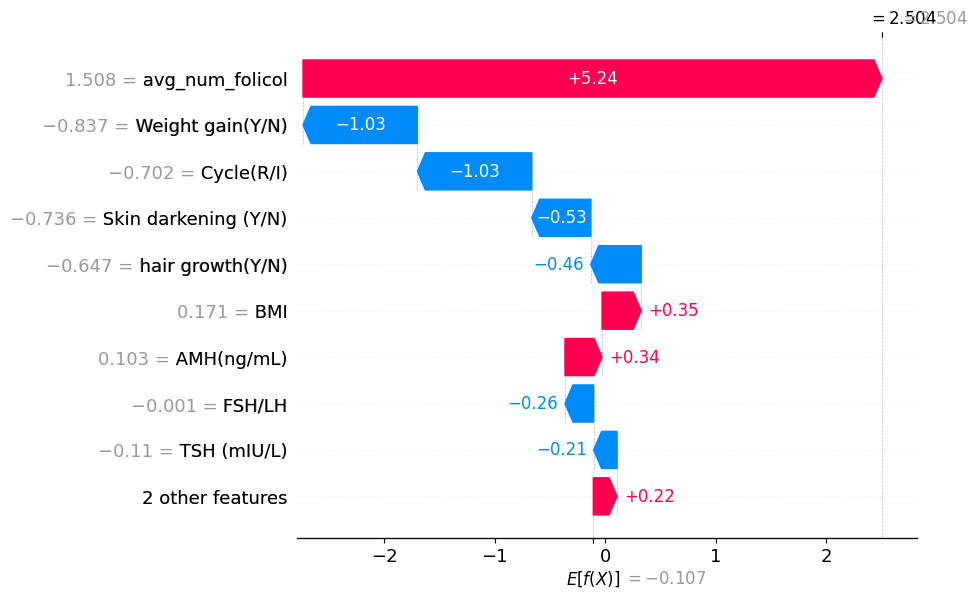

In [ ]:
xgb_pred = xgb.predict(patient_record_scaled)

if xgb_pred == [1] :
    print('PCOS Diagnosed')
else:
    print('PCOS Not Diagnosed')

print("=="*40)
print("SHAP values for the prediction is visualized below")
print("=="*40)
explainer = shap.Explainer(xgb)
patient_df = pd.DataFrame(patient_record_scaled, columns=cols_to_scale)
shap_values = explainer(patient_df)
shap.plots.waterfall(shap_values[0])

# TabNet Model

In [ ]:
# estimated run time: 90 seconds
!pip install pytorch-tabnet scikit-learn pandas numpy
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Convert to NumPy (required by TabNet)
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()

Train the model (Estimated training time: 50 seconds)

In [ ]:
tabnet = TabNetClassifier(
    n_d=8,
    n_a=16,
    n_steps=5,
    gamma=1.3,
    lambda_sparse=0.001,
    optimizer_fn=torch.optim.Adam,
    optimizer_params={'lr': 0.001},
    mask_type='sparsemax'
)

tabnet.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    patience=10, max_epochs=100,
    batch_size=48, virtual_batch_size=32
)

epoch 0  | loss: 0.77843 | val_0_auc: 0.64823 |  0:00:00s
epoch 1  | loss: 0.80397 | val_0_auc: 0.70136 |  0:00:00s
epoch 2  | loss: 0.69555 | val_0_auc: 0.72733 |  0:00:01s
epoch 3  | loss: 0.6896  | val_0_auc: 0.74967 |  0:00:01s
epoch 4  | loss: 0.68254 | val_0_auc: 0.7574  |  0:00:02s
epoch 5  | loss: 0.67298 | val_0_auc: 0.76199 |  0:00:02s
epoch 6  | loss: 0.66802 | val_0_auc: 0.78046 |  0:00:03s
epoch 7  | loss: 0.59276 | val_0_auc: 0.78638 |  0:00:03s
epoch 8  | loss: 0.58602 | val_0_auc: 0.79664 |  0:00:03s
epoch 9  | loss: 0.5485  | val_0_auc: 0.79773 |  0:00:04s
epoch 10 | loss: 0.55689 | val_0_auc: 0.80135 |  0:00:04s
epoch 11 | loss: 0.58096 | val_0_auc: 0.82502 |  0:00:05s
epoch 12 | loss: 0.53218 | val_0_auc: 0.8307  |  0:00:05s
epoch 13 | loss: 0.55721 | val_0_auc: 0.84857 |  0:00:06s
epoch 14 | loss: 0.52697 | val_0_auc: 0.83975 |  0:00:07s
epoch 15 | loss: 0.48869 | val_0_auc: 0.83553 |  0:00:07s
epoch 16 | loss: 0.52486 | val_0_auc: 0.83553 |  0:00:07s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Make Prediction for the Patient

PCOS Diagnosed
Local feature importance using sparse attention mechanism for the prediction is given below


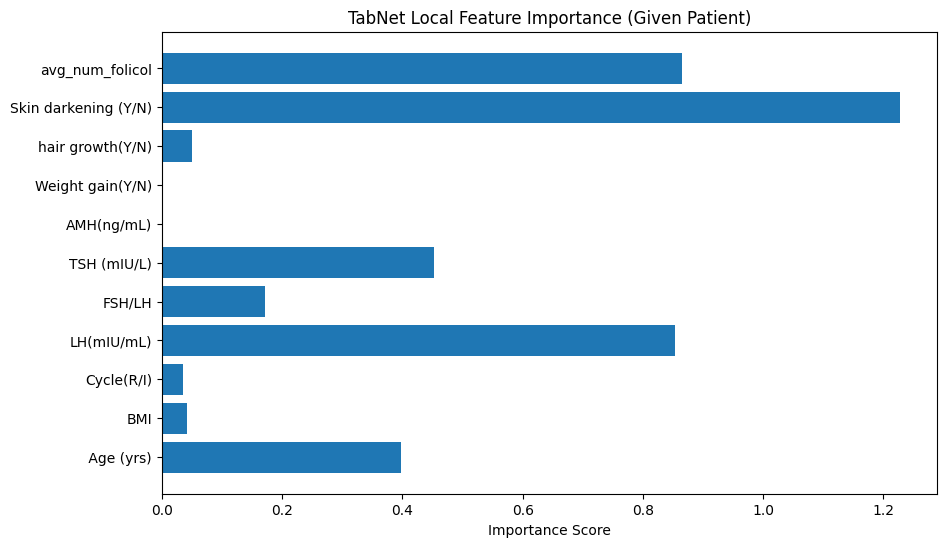

In [ ]:
tabnet_pred = tabnet.predict(patient_record_scaled)
if tabnet_pred == [1] :
    print('PCOS Diagnosed')
else:
    print('PCOS Not Diagnosed')
print("=="*40)
print("Local feature importance using sparse attention mechanism for the prediction is given below")
print("=="*40)

explain_matrix, masks = tabnet.explain(patient_df.values)
local_importance = explain_matrix[0]
plt.figure(figsize=(10, 6))
plt.barh(cols_to_scale, local_importance)
plt.title("TabNet Local Feature Importance (Given Patient)")
plt.xlabel("Importance Score")
plt.show()


# FT-Transformer Model

In [ ]:
!pip install rtdl
import torch.nn as nn
import torch.optim as optim
import rtdl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [ ]:
# Convert data to PyTorch tensors (needed for FT-Transformer)
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_torch = torch.tensor(y_test.to_numpy(), dtype=torch.long)

Train the model

In [ ]:
model = rtdl.FTTransformer.make_default(
    n_num_features=X_train.shape[1],
    cat_cardinalities=None,
    d_out=len(np.unique(y_train))
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_torch.to(device), x_cat=None)

    loss = criterion(y_pred, y_train_torch.to(device))
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")


Epoch 0/50, Loss: 0.6744
Epoch 10/50, Loss: 0.2722
Epoch 20/50, Loss: 0.2219
Epoch 30/50, Loss: 0.2034
Epoch 40/50, Loss: 0.1773


Get prediction for the patient

In [ ]:
import torch.nn.functional as F
patient_torch = torch.tensor(patient_record_scaled, dtype=torch.float32)
with torch.no_grad():
    ft_pred = model(patient_torch.to(device), x_cat=None).argmax(dim=1).cpu().numpy()
    logits = model(patient_torch.to(device), x_cat=None)
    probs = F.softmax(logits, dim=1).cpu().numpy()

if ft_pred == [1] :
    print('PCOS Diagnosed')
else:
    print('PCOS Not Diagnosed')

print("=="*40)
print('This model does not provide interpretability. However, you may get further insights from the class probabilities.')
print("A significantly higher probability determines the model's more confidence in its prediction.")
print("=="*40)
print(f'P (PCOS [Class 1]): {probs[0][1]}')
print(f'P (PCOS [Class 0]): {probs[0][0]}')

PCOS Diagnosed
This model does not provide interpretability. However, you may get further insights from the class probabilities.
A significantly higher probability determines the model's more confidence in its prediction.
P (PCOS [Class 1]): 0.9466392993927002
P (PCOS [Class 0]): 0.05336074158549309


#TabPFN

In [ ]:
!pip install tabpfn
from tabpfn import TabPFNClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rtdl 0.0.13 requires torch<2,>=1.7, but you have torch 2.6.0 which is incompatible.


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7be602740680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

Train the model

In [ ]:
tpfn = TabPFNClassifier(device="cpu")
tpfn.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:89: UserWarning: Downloading model to /root/.cache/tabpfn/tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/tabpfn/classifier.py:431: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(self.device, X)


TabPFNClassifier(device='cpu')

Make prediction on the patient (Estimated run time: 60 seconds).

In [ ]:
tpfn_pred = tpfn.predict(patient_record_scaled)
tpfn_proba = tpfn.predict_proba(patient_record_scaled)
if ft_pred == [1] :
    print('PCOS Diagnosed')
else:
    print('PCOS Not Diagnosed')

print("=="*40)
print('This model does not provide interpretability. However, you may get further insights from the class probabilities.')
print("A significantly higher probability determines the model's more confidence in its prediction.")
print("=="*40)
print(f'P (PCOS [Class 1]): {tpfn_proba[0][1]}')
print(f'P (PCOS [Class 0]): {tpfn_proba[0][0]}')

PCOS Diagnosed
This model does not provide interpretability. However, you may get further insights from the class probabilities.
A significantly higher probability determines the model's more confidence in its prediction.
P (PCOS [Class 1]): 0.9458467364311218
P (PCOS [Class 0]): 0.054153263568878174


# Prototypical Network

Train the model

In [ ]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
patient_record_pca = pca.transform(patient_record_scaled)

proto_0 = np.mean(X_train_pca[y_train == 0], axis=0)
proto_1 = np.mean(X_train_pca[y_train == 1], axis=0)
prototypes = np.vstack([proto_0, proto_1])



PCOS Not Diagnosed
This model does not provide interpretability, neither probability. However, it runs extremely fast.
You can use this model to match it other model predictions for majority voting purposes.


Get prediction on the patient

In [ ]:
distances = cdist(patient_record_pca, prototypes, metric='euclidean')
proto_pred = np.argmin(distances, axis=1)

if proto_pred == [1] :
    print('PCOS Diagnosed')
else:
    print('PCOS Not Diagnosed')

print("=="*40)
print('This model does not provide interpretability, neither probability. However, it runs extremely fast.')
print("You can use this model to match it other model predictions for majority voting purposes.")
print("=="*40)


# Model-Agnostic Meta-Learning (MAML)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
# Convert PCOS data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long)
# Split dataset
X_train, X_meta, y_train, y_meta = train_test_split(X_tensor, y_tensor, test_size=0.2, stratify=y, random_state=123)
# Create Dataloader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)

Train the model | Step 01

In [ ]:
# Simple Feedforward Model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=32):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 2)  # Binary classification

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# Initialize model
input_dim = X.shape[1]
model = SimpleNN(input_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Train on Main Dataset
for epoch in range(5):  # Train for a few epochs
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

# Save Pre-trained Model (Meta-Learned Model)
torch.save(model.state_dict(), "pretrained_model.pth")
print("Pre-trained model saved!")


Pre-trained model saved!


Train the model | Step 02

In [ ]:
# Load Pre-trained Model
model.load_state_dict(torch.load("pretrained_model.pth"))

# Prepare small fine-tuning dataset
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(X_meta, y_meta, test_size=0.5, random_state=42)

meta_train_loader = DataLoader(TensorDataset(X_meta_train, y_meta_train), batch_size=4, shuffle=True)

# Fine-tune on Small PCOS Subset (Simulating MAML's Fast Adaptation)
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Higher LR for fast adaptation

for epoch in range(3):  # Only a few steps!
    for X_batch, y_batch in meta_train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

print("Fast adaptation done!")


Fast adaptation done!


Get prediction on the patient

In [ ]:
patient_torch = torch.tensor(patient_record_scaled, dtype=torch.float32)
model.eval()
with torch.no_grad():
    maml_pred = model(patient_torch)
    maml_pred_label = torch.argmax(maml_pred, dim=1)

if maml_pred_label == torch.tensor([1]) :
    print('PCOS Diagnosed')
else:
    print('PCOS Not Diagnosed')

print("=="*40)
print('This model does not provide interpretability, neither probability. However, it runs extremely fast.')
print("You can use this model to match it other model predictions for majority voting purposes.")
print("=="*40)

PCOS Diagnosed


# Bayesian Neural Network (BNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

In [ ]:
# Convert data to numpy arrays and ensure proper shape
X_train_np = X_train.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

Train the model

In [ ]:
def build_mc_dropout_model(input_dim):
    model = keras.Sequential([
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


input_dim = X_train.shape[1]
bnn_model = build_mc_dropout_model(input_dim)

bnn_model.fit(X_train_np, y_train_np, epochs=500, batch_size=32, verbose=1)


Re-train the model (optional)

In [ ]:
bnn_model.fit(X_train_np, y_train_np, epochs=500, batch_size=32, verbose=1)

Get prediction for the patient

In [ ]:
patient_array = np.array(patient_record_scaled).reshape(1, -1)

num_samples = 1000  # Increase or decrease it according to your needs.

patient_preds = np.array([
    bnn_model(patient_array, training=True).numpy().flatten()[0]
    for _ in range(num_samples)
])

mean_pred = patient_preds.mean()
std_pred = patient_preds.std()

if mean_pred > 0.5:
    print("PCOS Diagnosed")
else:
    print("PCOS Not Diagnosed")
print("=="*40)
print('This model does not provide interpretability. However, you may get further insights from the class probabilities.')
print("A significantly higher probability determines the model's more confidence in its prediction.")
print(f'P (PCOS [Class 1]): {mean_pred}:.3f')
print(f'P (PCOS [Class 0]): {1-mean_pred:.3f}')
print("=="*40)


Get further information on uncertainty by utilizing BNN

In [ ]:
print('BNN provides further info on uncertainty by calculating std of model predictions.')
print('Higher standard deviation indicates higher uncertainty in model prediction.')
print(f'Model Uncertainty (std): {std_pred:.3f}')
print("=="*40)

print(f"The Bayesian Neural Network (BNN) predicts the patient's class {num_samples} times.")
print("If one class appears significantly more often than the other, it indicates a strong probability of belonging to that class — with low uncertainty.")
print("The bar chart below shows the frequency distribution of the predictions.")


print('=='*40)


class_preds = (patient_preds > 0.5).astype(int)
class_0_count = np.sum(class_preds == 0)
class_1_count = np.sum(class_preds == 1)
plt.figure(figsize=(6, 4))
bars = plt.bar(['PCOS Not Diagnosed', 'PCOS Diagnosed'],
               [class_0_count, class_1_count],
               color=['skyblue', 'salmon'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10,
             f'{int(height)} times', ha='center', va='bottom', fontsize=10)

plt.title('Bayesian Model Prediction Frequency (MC Dropout)')
plt.xlabel('Prediction Class')
plt.ylabel('Frequency (out of num_samples)')
plt.ylim(0, max(class_0_count, class_1_count) + 100)
plt.tight_layout()
plt.show()


# CNBE

Use the CNBE model from this colab file: https://colab.research.google.com/drive/1q7vKJ6gZaFAn7pcqW-jbNOVIHhnuvGl_?usp=sharing